In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [11]:
sales=pd.read_csv("sales.csv")
sales

,Index,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
sales=sales.drop(["Index"],axis=1)

In [13]:
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# DATA ANALYSIS

In [14]:
sales.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [15]:
sales.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [16]:
sales.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [18]:
sales.shape

(200, 4)

# DATA CLEANING

In [19]:
sales.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# EDA PROCESS

In [21]:
import seaborn as sns

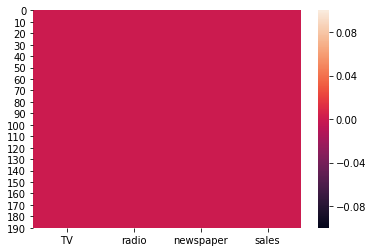

In [22]:
sns.heatmap(sales.isnull())

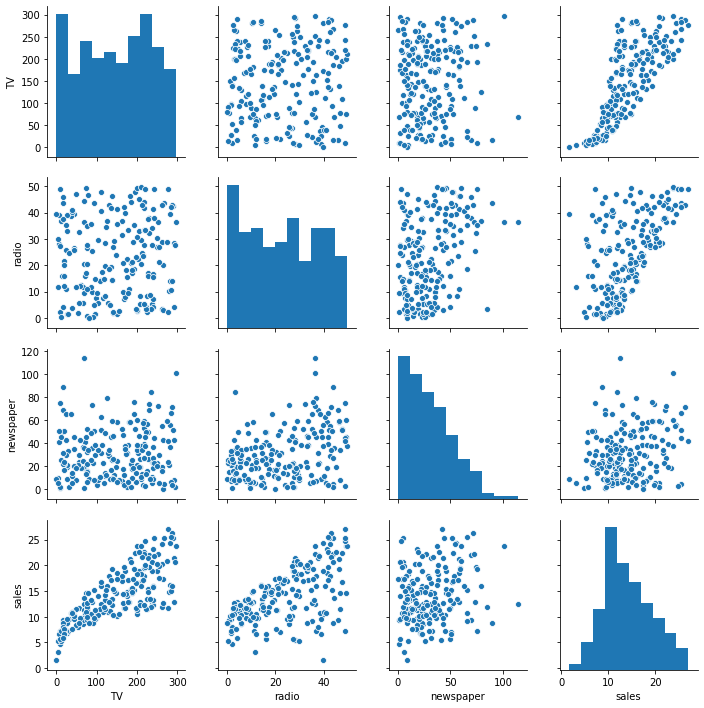

In [23]:
sns.pairplot(sales)

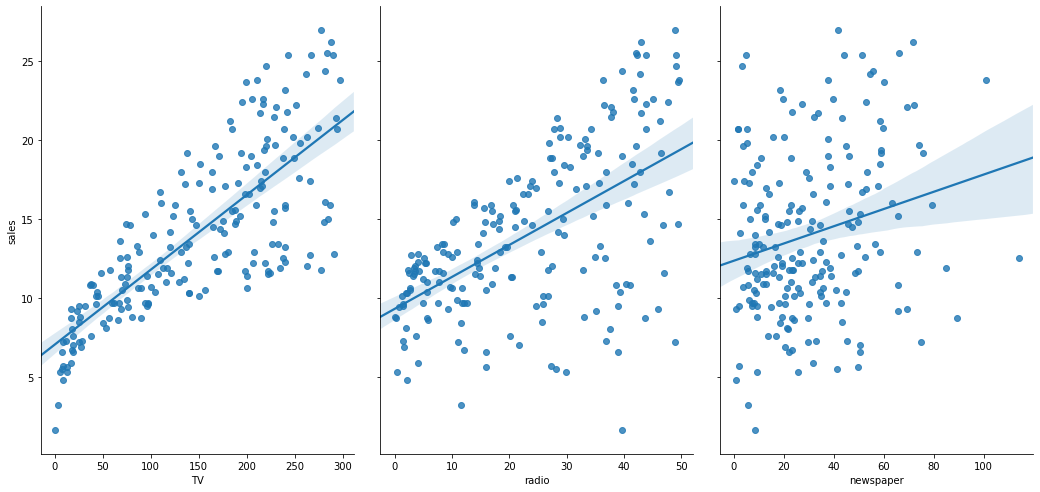

In [31]:
s=sns.pairplot(sales,x_vars=["TV","radio","newspaper"], y_vars="sales",kind="reg",size=7,aspect=0.7)

# SPLITTING DATA INTO X AND Y

In [73]:
x=sales.drop("sales",axis=1)
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [37]:
y=sales["sales"]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [39]:
x.shape

(200, 3)

In [40]:
y.shape

(200,)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=71)

In [75]:
x_train.shape

(158, 3)

In [76]:
y_train.shape

(158,)

In [77]:
x_test.shape

(42, 3)

In [78]:
y_test.shape

(42,)

# CHOOSE MODEL

In [79]:
lm=LinearRegression()

In [80]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lm.coef_

array([ 0.04500399,  0.19668982, -0.0050818 ])

In [82]:
lm.intercept_

3.0557859646127383

In [83]:
lm.score(x_train,y_train)

0.9160789968846071

In [84]:
pred=lm.predict(x_test)
print("Predicted result",pred)
print("Actual result",y_test)

Predicted result [ 3.5939201  13.52945977 19.46670009  8.77311071 21.30910949  7.91390727
  9.69782057  6.15839326 17.22726947 11.36298202 23.41343416 11.83153024
  7.60042847 18.06159768  6.19354427 24.92310423  6.55521282 10.8319938
 13.65736645  9.84137419  7.8792761  24.15323363  9.16945531 14.43070484
 17.39426681 15.03577564 16.90167955 17.61451864  8.54734661 12.42607409
 13.28681174 11.81725172  8.21777958  8.18081365 13.6668477  19.09280393
 15.47665486 10.58748056 12.68431764 14.01226525 11.97529405 10.06870492]
Actual result 108     5.3
122    11.6
28     18.9
132     5.7
69     22.3
121     7.0
145    10.3
189     6.7
64     18.0
31     11.9
147    25.4
136     9.5
34      9.5
20     18.0
106     7.2
175    27.0
182     8.7
130     1.6
100    11.7
73     11.0
129     9.7
98     25.4
125    10.6
135    11.6
41     17.1
85     15.2
35     12.8
163    18.0
191     9.9
159    12.9
167    12.2
86     12.0
196     9.7
49      9.7
174    11.5
68     18.9
25     12.0
94     11.5
5 

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
print("error")
print(mean_squared_error(y_test,pred))

error
5.28613873814586


In [87]:
print(r2_score(y_test,pred))

0.8247607476407971


In [72]:
sales.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
